 # Decision Tree of Iris dataset

 Basics and understanding the resulting decision tree.The steps are as follows

 - Importing a csv file using pandas,
 - Using pandas to prep the data for the scikit-leaarn decision tree code,
 - Drawing the tree, and
 - Producing pseudocode that represents the tree.


In [18]:
from __future__ import print_function

import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

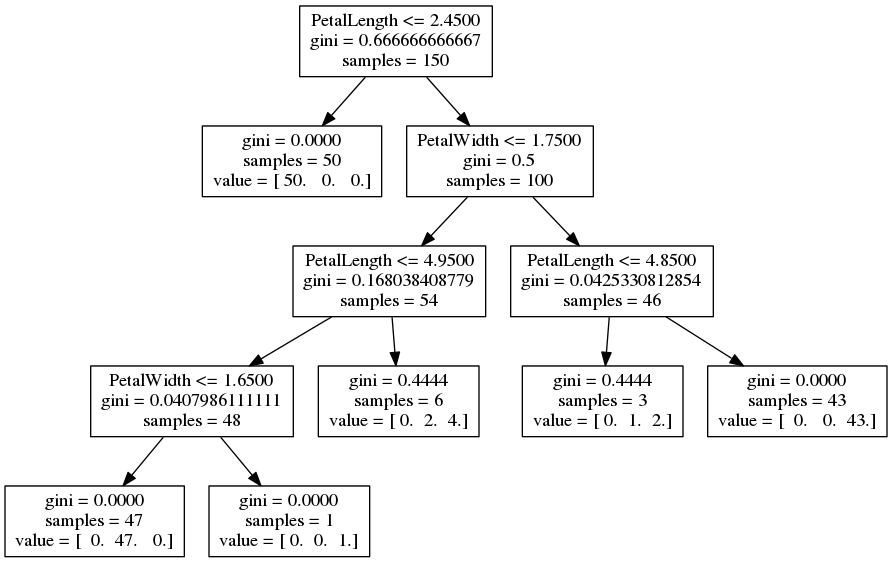

In [19]:
url='https://raw.githubusercontent.com/Lightning-Bug/ML-Starter-Pack/master/Decision%20Tree%20Classifier/Images/iris3.png'
from IPython.display import Image                        
Image(url,width=420, height=420)

<em>**We will be creating something similar to the above picture of Decision Tree.**<em/>

Next, we need some data to consider. I’ll use the famous iris data set, that has various measurements for a variety of different iris types. I think both pandas and sckit-learn have easy import options for this data, but I’m going to write a function to import from a csv file, using pandas.

In [3]:
def get_iris_data():
    """Get the iris data, from local csv or pandas repo."""
    if os.path.exists("iris.csv"):
        print("-- iris.csv found locally")
        df = pd.read_csv("iris.csv", index_col=0)
    else:
        print("-- trying to download from github")
        fn = "https://raw.githubusercontent.com/pydata/pandas/" + \
             "master/pandas/tests/data/iris.csv"
        try:
            df = pd.read_csv(fn)
        except:
            exit("-- Unable to download iris.csv")

        with open("iris.csv", 'w') as f:
            print("-- writing to local iris.csv file")
            df.to_csv(f)

    return df

**NOTES**

   - This function first tries to read the data locally, using pandas. This is why I import os above: to make use of the os.path.exists() method. If the iris.csv file is found in the local directory, pandas is used to read the file using pd.read_csv()– note that pandas has been import using import pandas as pd. This is typical usage for the package.
   - If a local iris.csv is not found, pandas is used to grab the data from a url and a local copy is saved for future runs.

In [ ]:
df = get_iris_data()

Now let's see what our Iris dataset has got, **.info()** will give us all information of the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
print("* df.head()", df.head(), sep="\n", end="\n\n")
print("* df.tail()", df.tail(), sep="\n", end="\n\n")

* df.head()
   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

* df.tail()
     SepalLength  SepalWidth  PetalLength  PetalWidth            Name
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica



From this information we can talk about our goal: to predict Name (or, type of iris) given the features SepalLength, SepalWidth, PetalLength and PetalWidth.<br/> We can use pandas to show the three iris types:

In [9]:
print("* iris types:", df["Name"].unique(), sep="\n")

* iris types:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Preprocessing

In order to pass this data into scikit-learn we need to encode the Names to integers. To do this we’ll write another function and return the modified data frame as well as a list of the target (class) names

In [10]:
def encode_target(df, target_column):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.

    Returns
    -------
    df_mod -- modified DataFrame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

Let’s see what we have (I’ll show just Name and Target columns to prevent wrapping)

In [11]:
df2, targets = encode_target(df, "Name")
print("* df2.head()", df2[["Target", "Name"]].head(),
      sep="\n", end="\n\n")
print("* df2.tail()", df2[["Target", "Name"]].tail(),
      sep="\n", end="\n\n")
print("* targets", targets, sep="\n", end="\n\n")

* df2.head()
   Target         Name
0       0  Iris-setosa
1       0  Iris-setosa
2       0  Iris-setosa
3       0  Iris-setosa
4       0  Iris-setosa

* df2.tail()
     Target            Name
145       2  Iris-virginica
146       2  Iris-virginica
147       2  Iris-virginica
148       2  Iris-virginica
149       2  Iris-virginica

* targets
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']



Looks good, **Iris-setosa** has been mapped to **zero**, **Iris-versicolor** to **one**, and **Iris-virginica** to **three**. Next, we get the names of the feature columns

In [12]:
features = list(df2.columns[:4])
print("* features:", features, sep="\n")

* features:
['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']


## Fitting the decision Tree

Now we can fit the decision tree, using the DecisionTreeClassifier imported above, as follows

In [13]:
y = df2["Target"]
X = df2[features]
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

**NOTE :**
  - We pull the X and y data from the pandas dataframe using simple indexing.
  - The decision tree, imported at the start of the post, is initialized with two parameters: min_samples_split=20 requires 20 samples in a node for it to be split (this will make more sense when we see the result) and random_state=99 to seed the random number generator.


## Visualizing the tree

We can produce a graphic (if **[graphviz](http://www.graphviz.org/)** is available on your system– if not check the site and see if you can install ) using the following function

In [14]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")


 - The export_graphviz method, imported from scikit-learn above, writes a dot file. This file is used to produce the graphic.
 - subprocess, imported above, is used to process the dot file and generate the graphic dt.png– see the example below.

So, running the function:

In [17]:
visualize_tree(dt, features)

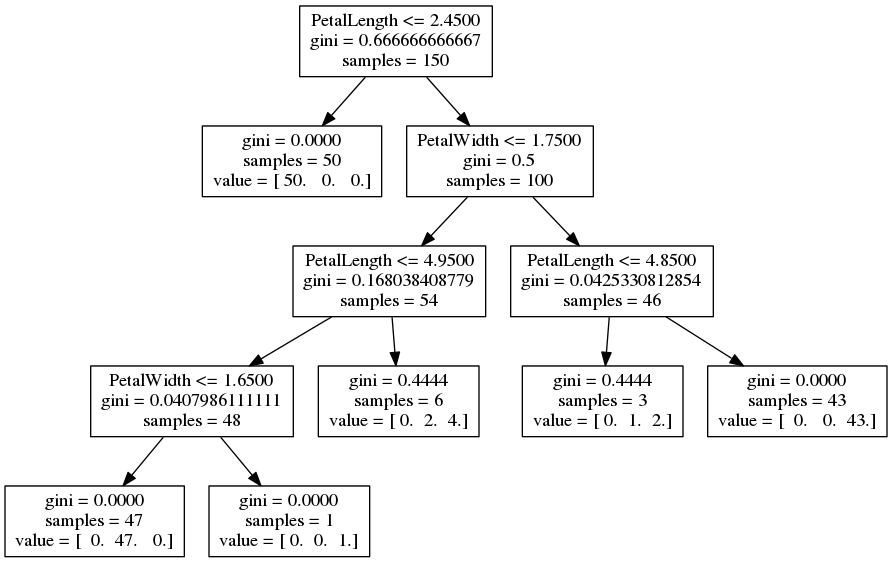

In [17]:
url='https://raw.githubusercontent.com/Lightning-Bug/ML-Starter-Pack/master/Decision%20Tree%20Classifier/Images/iris3.png'
from IPython.display import Image                        
Image(url,width=400, height=400)

Okay, what does this all mean? Well, we can use this figure to understand it in a very easy if/else way as given in the pseudo code below,Same thing our decision tree is doing using standard libraries of DataScience.
   - The target names can be passed to the function and are included in the output. The output now shows both the features used for branching conditions as well as the class, or classes, found in the resulting node/bin.
   - The if/else structure has indenting, using the spacer_base argument to make the output easier to read (I think).

That said, the function is:

In [15]:
def get_code(tree, feature_names, target_names,
             spacer_base="    "):
    """Produce psuedo-code for decision tree.

    Args
    ----
    tree -- scikit-leant DescisionTree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)

In [19]:
get_code(dt, features, targets)

if ( PetalLength <= 2.45000004768 ) {
    return Iris-setosa ( 50 examples )
}
else {
    if ( PetalWidth <= 1.75 ) {
        if ( PetalLength <= 4.94999980927 ) {
            if ( PetalWidth <= 1.65000009537 ) {
                return Iris-versicolor ( 47 examples )
            }
            else {
                return Iris-virginica ( 1 examples )
            }
        }
        else {
            return Iris-versicolor ( 2 examples )
            return Iris-virginica ( 4 examples )
        }
    }
    else {
        if ( PetalLength <= 4.85000038147 ) {
            return Iris-versicolor ( 1 examples )
            return Iris-virginica ( 2 examples )
        }
        else {
            return Iris-virginica ( 43 examples )
        }
    }
}
